<a href="https://colab.research.google.com/github/desuhouro/deeplr_HW/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

# National Tsing Hua University

### Fall 2023

#### 11210IPT 553000

#### Deep Learning in Biomedical Optical Imaging

## Homework 2

</div>


### ✏️ Task A: Transitioning to Cross-Entropy Loss (20 pts)

In Lab, we utilized the **Binary Cross-Entropy (BCE) Loss** for a binary classification task. The BCE loss is articulated as:

$$ \text{BCE}(y, \hat{y}) = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right) $$

Here, $y$ is the true label (0 or 1), and $\hat{y}$ denotes the predicted probability of $y=1$.

In this task, we aim to explore the implementation of a model using **Cross-Entropy (CE) Loss**, which is a more common approach for classification tasks, especially when dealing with multiple classes. CE loss is expressed as:

$$ \text{CE}(y, \hat{y}) = -\sum_{i} y^{(i)} \log(\hat{y}^{(i)}) $$

In this expression, $y$ represents the ground truth labels, $ \hat{y} $ is the predictions from your model, and $i$ is the index of the class.


#### 1. Modify the Loss (3 pts)
Transition to using Cross-Entropy (CE) Loss for the classification task by utilizing PyTorch's built-in functionalities. You can refer to the [official PyTorch documentation](https://pytorch.org/docs/stable/nn.html) for detailed information and guidance to ensure the correct implementation of the CE loss.

In [ ]:
import torch.nn as nn

# Replace '...' with the appropriate loss function in PyTorch
loss = nn.CrossEntropyLoss()

#### 2. Modify the Model Architecture (2 pts)
To adapt the original code for use with Cross-Entropy (CE) loss, make necessary modifications to the model architecture. Ensure it is compatible and optimized for the application of CE loss. Consider the number of output nodes and the activation function used in the output layer for effective multi-class classification.

In [ ]:
# Modifying the architecture to be compatible with CE loss
ce_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(256*256*1, 256),
    nn.ReLU(),
    nn.Linear(256, 2)
).cuda()

#### 3. Reflection Questions (15 pts, 5 pts for each)
Provide detailed answers to the questions below:

**Q1. Loss Function Comparison:**  
   What are the differences between Binary Cross-Entropy (BCE) loss and Cross-Entropy (CE) loss?

**Q2. Model Architecture Modification:**  
   What motivated the specific changes you made to the model architecture?

**Q3. Adapting to CE Loss:**  
   In the original code configured for BCE loss, two major adjustments are needed for adaptation to CE loss. Analyze and explain the necessity for these changes, referring to the code below.

```python
for images, labels in train_loader:
    images = images.cuda()
    images = images / 255.0
    labels = labels.cuda()
    optimizer.zero_grad()
    outputs = model(images)

    # Change #1: Adaptation to the labels for CE loss
    labels = labels.long()  # Changed from labels.float().unsqueeze(1) for BCE loss

    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

    # Change #2: Predictions for CE loss
    train_predicted = outputs.argmax(-1)  # Changed from torch.sigmoid(outputs) > 0.5 for BCE loss
    train_correct += (train_predicted == labels).sum().item()
```

#### Put Your Response Here:

## 1.Binary Cross-Entropy (BCE) loss 和 Cross-Entropy (CE) loss分別為
### 一、Binary Cross-Entropy (BCE) Loss：
#####BCE Loss 適用於二元分類問題，譬如用來預測有或沒有肺癌的機率，沒有為0、有則為1，因此，BCE Loss 的輸出是一個概率值，表示最終預測為有肺癌的機率的信心程度。通常，這個概率值在 0 到 1 之間。因此最終輸出可能為: 有肺癌的機率為:0.7
####  二、Cross-Entropy (CE) Loss：
#####CE Loss 適用於多類別分類問題，其目標是測量模型對每個類別的預測概率。因此，CE Loss 的輸出是一個包含每個類別的機率，它表示模型對每個可能的類別的信心程度。因此最終最終輸出可能為:  normal的機率:0.4 、pneumonia的機率: 0.6
>所以兩者的差別為，BCE Loss 輸出為預測樣本為正類的概率，而 CE Loss 輸出了對每個可能類別的概率。所以在使用本次normal和pneumonia的loss時，BCE Loss建立model的時候，倒數第二行是用nn.Linear(256, 1)(輸出為abnormal的機率)，而CE Loss的model則是用nn.Linear(256, 2)因為此時要輸出為normal和pneumonia的兩個機率。

#### 2. 在使用本次normal和pneumonia的loss時，BCE Loss建立model的時候，倒數第二行是用nn.Linear(256, 1)(輸出為abnormal的機率)，而CE Loss的model則是用nn.Linear(256, 2)因為此時要輸出為normal和pneumonia的兩個機率。要改動的原因即是因為最終Loss function算出來的答案數量不一樣，BCE只會給一個機率，而CE會給兩個的機率。

#### 3.
####labels = labels.long()：這一行是 Change 1，在這裡對lable進行了調整。原本，BCE的labels可以是浮點數(因為不用真的區分只要有abnormal的機率即可)，但由於現在要使用 CE Loss，所以需要將標籤轉換為整數(兩個label，abnormal和normal)，以表示樣本屬於哪個類別。所以在這裡使用了labels.long()將lable轉換為整數型別。

####train_predicted = outputs.argmax(-1)：這一行是 Change 2，在這裡對預測進行了調整。原本的預測是通過 Sigmoid 函數應用於輸出，然後將結果與 0.5 進行比較，以確定樣本是abnormal還是normal（二元分類）。但對於 CE Loss，需要根據不同的類別(abnormal和normal)的輸出概率來預測樣本屬於哪個類別，因此使用 outputs.argmax(-1) 直接選得到具有最高機率的類別當作預測結果。

### ✏️ Task B: Creating an Evaluation Code (20 pts)

Evaluate the performance of a pretrained deep learning model with a test dataset of chest X-ray images available in `test_normal.npy` and `test_pneumonia.npy` files. These files respectively contain 200 grayscale normal and pneumonia chest X-ray images, each of size 256×256. The objective is to calculate the model’s accuracy, defined as the percentage of images correctly classified. To accomplish this, you are tasked to write code that loads, processes, and evaluates the model on this specific dataset. Ensure each segment of code replacing the `...` placeholders is functional and aligns with the steps provided in the instructions.

**Note: ⚠️ Ensure to upload your trained model's weights to your working environment if needed.**

### Step 0: Download test dataset

In [ ]:
!wget https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/test/test_normal.npy
!wget https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/test/test_pneumonia.npy

--2023-10-14 00:24:28--  https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/test/test_normal.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13107328 (12M) [application/octet-stream]
Saving to: ‘test_normal.npy’

test_normal.npy     100%[===================>]  12.50M  --.-KB/s    in 0.1s    

2023-10-14 00:24:28 (98.6 MB/s) - ‘test_normal.npy’ saved [13107328/13107328]

--2023-10-14 00:24:28--  https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/test/test_pneumonia.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respon

### Step 1: Prepare your test dataset

In [ ]:
import numpy as np

test_abnormal = np.load('test_pneumonia.npy')
test_normal = np.load('test_normal.npy')

print(f'Shape of test_abnormal: {test_abnormal.shape}')
print(f'Shape of test_normal: {test_normal.shape}')

# For the data having presence of pneumonia assign 1, for the normal ones assign 0.
test_abnormal_labels = np.ones((test_abnormal.shape[0],))
test_normal_labels = np.zeros((test_normal.shape[0],))

x_test = np.concatenate((test_abnormal, test_normal), axis=0)
y_test = np.concatenate((test_abnormal_labels, test_normal_labels), axis=0)

print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of test_abnormal: (200, 256, 256)
Shape of test_normal: (200, 256, 256)
Shape of x_test: (400, 256, 256)
Shape of y_test: (400,)


### Step 2: Load Test Images into PyTorch DataLoader (5 pts)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

# Convert to PyTorch tensors
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

# Combine the images and labels into a dataset
test_dataset = TensorDataset(x_test, y_test)

# Create a dataloader to load data in batches. Set batch size to 32.
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

### Step 3: Prepare Your Trained Model  (5 pts)
- Define the architecture to match exactly with the trained model intended for inference. Ensure strict alignment to avoid errors during evaluation.
- Load the weights from the trained model and set the model to evaluation mode

In [ ]:
import torch.nn as nn
# Declare the model architecture
model = nn.Sequential(
    nn.Flatten(),

    nn.Linear(256*256*1, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 1)
).cuda()
# Load the trained weights
model.load_state_dict(torch.load('/content/drive/MyDrive/deeplearning/model_classification.pth'))
# Set the model to evaluation mode
model.eval()

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=65536, out_features=64, bias=True)
  (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU()
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=64, out_features=64, bias=True)
  (6): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=64, out_features=64, bias=True)
  (10): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 4: Perform Inference and Calculate the Accuracy (10 pts)
- Ensure the image values are processed in a manner consistent with the training phase.
- Use the model that was trained with BCE loss to execute inference on the test dataset.
- Note that inference should be performed in GPU.

###BCE test

Take # 227 as test image.
This model is 72.42% confident that the scan is abnormal and 27.58% confident that the scan is normal.

Prediction is abnormal.
Incorrect 😢



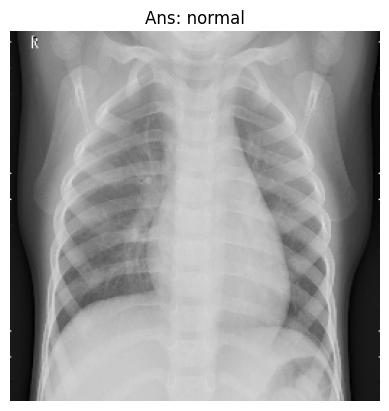

In [ ]:
import matplotlib.pyplot as plt
index = np.random.randint(0, len(x_test))
print(f'Take # {index} as test image.')

# Normalize the image just like during training
test_image = (x_test[index] / 255.0).clone().detach().float().cuda()
test_image = test_image.unsqueeze(0)  # add batch dimension

# Model prediction
with torch.no_grad():
    prediction = model(test_image)
    prediction = torch.sigmoid(prediction)  # Convert logits to probabilities

class_names = ['normal', 'abnormal']
confidence = torch.sigmoid(prediction).squeeze().item()

print(f'This model is {round(100 * confidence, 2)}% confident that the scan is {class_names[1]} and {round(100 * (1 - confidence), 2)}% confident that the scan is {class_names[0]}.')

predicted_class = class_names[0] if confidence < 0.5 else class_names[1]

print()
print(f'Prediction is {predicted_class}.')
print(f'{"Correct 😊" if predicted_class == class_names[y_test[index].item()] else "Incorrect 😢"}')
print()

plt.axis('off')
plt.title(f"Ans: {'abnormal' if y_test[index] else 'normal'}")
plt.imshow(x_test[index], cmap='gray')  # Assuming the images are grayscale and channel-first
plt.show()

CE test

Take # 397 as a test image.
This model is 50.32% confident that the scan is normal.
This model is 49.68% confident that the scan is abnormal.

Prediction is normal.
Actual class is normal.
Correct 😊



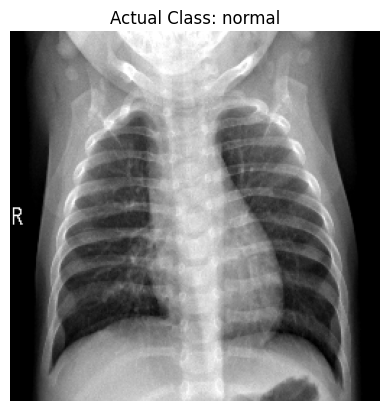

In [ ]:
import torch.nn as nn
# Declare the model architecture
ce_model = nn.Sequential(
    nn.Flatten(),

    nn.Linear(256*256*1, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 2)
).cuda()
# Set the model to evaluation mode
ce_model.eval()
import matplotlib.pyplot as plt
import numpy as np

# 1. 隨機選擇一個測試圖像的索引
index = np.random.randint(0, len(x_test))
print(f'Take # {index} as a test image.')

# 2. 正規化測試圖像，準備輸入到模型中
# Normalize the image just like during training
test_image = (x_test[index] / 255.0).clone().detach().float().cuda()
test_image = test_image.unsqueeze(0)  # add batch dimension


# 3. 模型預測
with torch.no_grad():
    prediction = model(test_image)

# 4. 將模型的輸出轉換為類別概率分佈
class_probabilities = torch.softmax(prediction, dim=1).cpu().numpy()

class_names = ['normal', 'abnormal']

# 5. 輸出類別概率
for i, class_name in enumerate(class_names):
    confidence = class_probabilities[0, i]  # 取得指定類別的概率
    print(f'This model is {round(100 * confidence, 2)}% confident that the scan is {class_name}.')

# 6. 選擇預測的類別
predicted_class = class_names[np.argmax(class_probabilities)]

# 7. 判斷預測是否正確
true_class = class_names[y_test[index]]
prediction_status = "Correct 😊" if predicted_class == true_class else "Incorrect 😢"
print(f'\nPrediction is {predicted_class}.')
print(f'Actual class is {true_class}.')
print(f'{prediction_status}\n')

plt.axis('off')
plt.title(f"Actual Class: {true_class}")
plt.imshow(x_test[index].squeeze(), cmap='gray')
plt.show()
